Disclaimer: In this notebook, I used GPT to generate code for print statements and debug logs, as well as generating plots. But the idea, the words and choosing the datasets and working with them are all my work. 

# 1. Imports
- frameworks
- datasets

In [49]:
# Basic utilities
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Plotting (Plotly)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
gender = pd.read_csv('gender+by+name.zip')
bankrupts = pd.read_csv('taiwanese+bankruptcy+prediction.zip')
cols = [
    "class",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]
mushroom = pd.read_csv("mushroom/agaricus-lepiota.data", header=None, names=cols)
print(gender.info())
print(mushroom.info())
print(bankrupts.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment      

# 2. Basic EDA
## 2.1 Mushrooms dataset
This is the only dataset that has missing values 

In [3]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df = mushroom.copy()
df["stalk-root"].unique()
missing_count = (df["stalk-root"] == "?").sum()
missing_count/len(df)


np.float64(0.3052683407188577)

The stalk-root column has too many missing values, so Im dropping it. 

In [5]:
mushroom = mushroom.drop(columns=["stalk-root"])
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [6]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
enc = OrdinalEncoder()
mushroom = pd.DataFrame(enc.fit_transform(mushroom), columns=mushroom.columns)
mushroom = mushroom.rename(columns={"class":"poisonous"})

In [77]:
mushroom

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [78]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   poisonous                 8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-surface-above-ring  8124 non-null   float64
 12  stalk-surface-below-ring  8124 non-null   float64
 13  stalk-color-above-ring    8124 non-null   float64
 14  stalk-co

/var/folders/q9/dv0qd5v93jv_7gz3d0y5d0xc0000gn/T/ipykernel_3563/1349656660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mushroom, x="poisonous", palette="Set2")


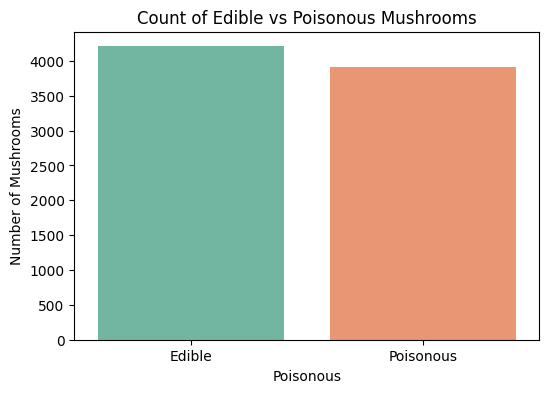

In [8]:
# Bar plot of class counts
plt.figure(figsize=(6,4))
sns.countplot(data=mushroom, x="poisonous", palette="Set2")
plt.title("Count of Edible vs Poisonous Mushrooms")
plt.xlabel("Poisonous")
plt.ylabel("Number of Mushrooms")
plt.xticks([0,1], ["Edible", "Poisonous"])
plt.show()

## 2.2 Gender dataset
Challenge of this dataset is that the names are strings, so we'd have to convert them into some represenation without string. 

In [9]:
gender.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


/var/folders/q9/dv0qd5v93jv_7gz3d0y5d0xc0000gn/T/ipykernel_3563/2984661251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender, x="Gender", y="Count", palette="pastel")


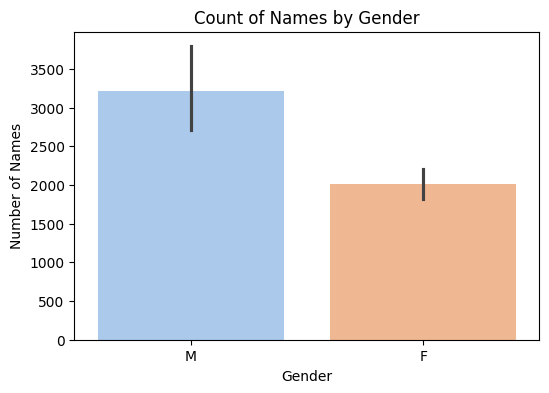

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(data=gender, x="Gender", y="Count", palette="pastel")
plt.title("Count of Names by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Names")
plt.show()

In [11]:
char_to_int = {c: i for i, c in enumerate("abcdefghijklmnopqrstuvwxyz")}
max_len = gender['Name'].str.len().max()
def encode_name(name, max_len=max_len):
    name = name.lower()
    vec = [char_to_int.get(c, -1) for c in name]  
    if len(vec) < max_len:
        vec += [-1] * (max_len - len(vec))  
    return vec
X_names = np.array(gender['Name'].apply(encode_name).to_list())
X_numeric = gender[['Count', 'Probability']].values
X_final = np.hstack([X_names, X_numeric])
name_cols = [f"char_{i+1}" for i in range(X_names.shape[1])]
numeric_cols = ['Count', 'Probability']
all_cols = name_cols + numeric_cols
gender_numeric = pd.DataFrame(X_final, columns=all_cols)
gender_numeric['Gender'] = (gender['Gender'] == 'M').astype(int)
gender_numeric.head() # For gender, 1 is male, 0 is female 


,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,...,char_19,char_20,char_21,char_22,char_23,char_24,char_25,Count,Probability,Gender
0,9.0,0.0,12.0,4.0,18.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5304407.0,0.014517,1
1,9.0,14.0,7.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5260831.0,0.014398,1
2,17.0,14.0,1.0,4.0,17.0,19.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4970386.0,0.013603,1
3,12.0,8.0,2.0,7.0,0.0,4.0,11.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4579950.0,0.012534,1
4,22.0,8.0,11.0,11.0,8.0,0.0,12.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4226608.0,0.011567,1


In [76]:
gender_numeric.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   char_1       147269 non-null  float64
 1   char_2       147269 non-null  float64
 2   char_3       147269 non-null  float64
 3   char_4       147269 non-null  float64
 4   char_5       147269 non-null  float64
 5   char_6       147269 non-null  float64
 6   char_7       147269 non-null  float64
 7   char_8       147269 non-null  float64
 8   char_9       147269 non-null  float64
 9   char_10      147269 non-null  float64
 10  char_11      147269 non-null  float64
 11  char_12      147269 non-null  float64
 12  char_13      147269 non-null  float64
 13  char_14      147269 non-null  float64
 14  char_15      147269 non-null  float64
 15  char_16      147269 non-null  float64
 16  char_17      147269 non-null  float64
 17  char_18      147269 non-null  float64
 18  char_19      147269 non-

## 2.3 Bankrupt dataset

In [12]:
bankrupts.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


/var/folders/q9/dv0qd5v93jv_7gz3d0y5d0xc0000gn/T/ipykernel_3563/1771985786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bankrupts, x="Bankrupt?", palette="Set1")


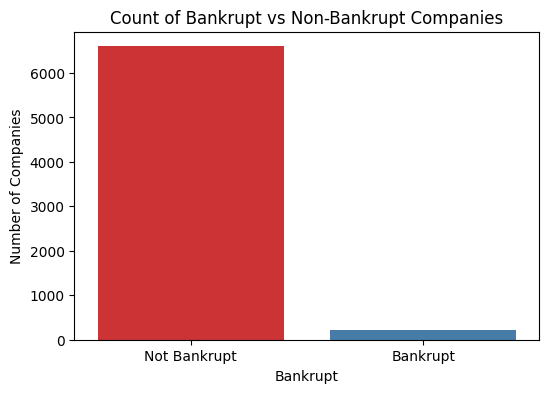

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=bankrupts, x="Bankrupt?", palette="Set1")
plt.title("Count of Bankrupt vs Non-Bankrupt Companies")
plt.xlabel("Bankrupt")
plt.ylabel("Number of Companies")
plt.xticks([0,1], ["Not Bankrupt", "Bankrupt"])
plt.show()

# 3. Train test partitions: 20/80, 50/50, 80/20

### 3.1 Main function for creating partition for ease of use, and created partitions

In [23]:
def create_partitions(df, y_col, seeds=[0, 42, 99]):
    partitions = {}
    X = df.drop(columns=[y_col])
    y = df[y_col]
    splits = [0.2, 0.5, 0.8] 
    for seed in seeds:
        partitions[seed] = {}
        for train_frac in splits:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, train_size=train_frac, random_state=seed, stratify=y
            )
            partitions[seed][train_frac] = (X_train, X_test, y_train, y_test)
    return partitions


Preparing to split datasets:

In [ ]:
datasets = {"mushroom": mushroom, 
            "bankrupt": bankrupts, 
            "gender": gender_numeric}
splits = [0.2, 0.5, 0.8]       
seeds = [0, 42, 99]            
all_partitions = {} 

In [ ]:
for dname, df in datasets.items():
    
    if dname.lower() == "mushroom":
        target = "poisonous"
    elif dname.lower() == "bankrupt":
        target = "Bankrupt?"   
    elif dname.lower() == "gender":
        target = "Gender"
    else:
        raise ValueError(f"Unknown dataset name: {dname}")
    X = df.drop(columns=[target])
    y = df[target]
    
    all_partitions[dname] = {}
    
    for seed in seeds:
        all_partitions[dname][seed] = {}
        for frac in splits:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, train_size=frac, random_state=seed, stratify=y
            )
            all_partitions[dname][seed][frac] = (X_train, X_test, y_train, y_test)

In [46]:
all_partitions

{'mushroom': {0: {0.2: (      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
    155         5.0          3.0        4.0      1.0   3.0              1.0   
    4584        2.0          0.0        3.0      0.0   2.0              1.0   
    2859        5.0          0.0        2.0      1.0   5.0              1.0   
    2455        2.0          0.0        4.0      1.0   5.0              1.0   
    2780        2.0          0.0        4.0      1.0   5.0              1.0   
    ...         ...          ...        ...      ...   ...              ...   
    3962        2.0          0.0        9.0      0.0   2.0              1.0   
    4315        2.0          0.0        3.0      0.0   2.0              1.0   
    3214        2.0          0.0        2.0      1.0   5.0              1.0   
    1207        2.0          3.0        8.0      1.0   6.0              1.0   
    3833        5.0          2.0        8.0      0.0   1.0              1.0   
    
          gill-spacing  gil

Check that we do indeed have: 3 datasets * 3 partitions * 3 trials = 27 

In [26]:
total_splits = 0
for dname, seeds_dict in all_partitions.items():
    for seed, partitions_dict in seeds_dict.items():
        total_splits += len(partitions_dict)  # number of partitions per seed

print("Total splits:", total_splits)  # multiply by 3 datasets


Total splits: 27


# 4. Training models
### 4.1 setup: general functions to use 

In [43]:
def train_classifier(model, param_grid, X_train, y_train, cv=5):
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_score = grid.best_score_  
    return best_model, best_params, best_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    return train_acc, test_acc

classifiers = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), {"C":[0.01,0.1,1,10]}),
    "RandomForest": (RandomForestClassifier(), {"n_estimators":[50,100], "max_depth":[None,10,20]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors":[3,5,7]})
}

In [ ]:
# results = []

# for dname, seeds_dict in all_partitions.items():
#     print(f"Processing dataset: {dname}")
#     for seed, partitions_dict in seeds_dict.items():
#         print(f"  Seed: {seed}")
#         for frac, split in partitions_dict.items():
#             print(f"    Train fraction: {frac}")
#             X_train, X_test, y_train, y_test = split
#             for clf_name, (model, param_grid) in classifiers.items():
#                 print(f"      Training classifier: {clf_name}...", end="")
#                 best_model, best_params, val_score = train_classifier(model, param_grid, X_train, y_train)
#                 train_acc, test_acc = evaluate_model(best_model, X_train, y_train, X_test, y_test)
                
#                 results.append({
#                     "dataset": dname,
#                     "seed": seed,
#                     "train_frac": frac,
#                     "classifier": clf_name,
#                     "best_params": best_params,
#                     "val_acc": val_score,
#                     "train_acc": train_acc,
#                     "test_acc": test_acc
#                 })
#                 print(f" done! Train acc: {train_acc:.3f}, Test acc: {test_acc:.3f}")


Processing dataset: mushroom
  Seed: 0
    Train fraction: 0.2
      Training classifier: LogisticRegression... done! Train acc: 0.940, Test acc: 0.944
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 0.999
      Training classifier: KNN... done! Train acc: 0.996, Test acc: 0.991
    Train fraction: 0.5
      Training classifier: LogisticRegression... done! Train acc: 0.942, Test acc: 0.944
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 1.000
      Training classifier: KNN... done! Train acc: 0.999, Test acc: 0.997
    Train fraction: 0.8
      Training classifier: LogisticRegression... done! Train acc: 0.949, Test acc: 0.941
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 1.000
      Training classifier: KNN... done! Train acc: 1.000, Test acc: 0.999
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression... done! Train acc: 0.947, Test acc: 0.946
      Training classifier: 

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 done! Train acc: 0.968, Test acc: 0.968
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 0.968
      Training classifier: KNN... done! Train acc: 0.968, Test acc: 0.968
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression... done! Train acc: 0.963, Test acc: 0.957
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 0.969
      Training classifier: KNN... done! Train acc: 0.969, Test acc: 0.966
    Train fraction: 0.5
      Training classifier: LogisticRegression... done! Train acc: 0.964, Test acc: 0.964
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 0.967
      Training classifier: KNN... done! Train acc: 0.968, Test acc: 0.968
    Train fraction: 0.8
      Training classifier: LogisticRegression... done! Train acc: 0.961, Test acc: 0.960
      Training classifier: RandomForest... done! Train acc: 0.995, Test acc: 0.972
      Training classifier: KNN... done! Train acc: 0.96

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest... done! Train acc: 0.986, Test acc: 0.748
      Training classifier: KNN... done! Train acc: 0.710, Test acc: 0.593
    Train fraction: 0.5
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest... done! Train acc: 0.954, Test acc: 0.764
      Training classifier: KNN... done! Train acc: 0.718, Test acc: 0.604
    Train fraction: 0.8
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest... done! Train acc: 0.933, Test acc: 0.770
      Training classifier: KNN... done! Train acc: 0.725, Test acc: 0.610
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest... done! Train acc: 0.986, Test acc: 0.749
      Training classifier: KNN... done! Train acc: 0.710, Test acc: 0.593
    Train fraction: 0.5
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest... done! Train acc: 0.956, Test acc: 0.763
      Training classifier: KNN... done! Train acc: 0.719, Test acc: 0.605
    Train fraction: 0.8
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.609, Test acc: 0.610
      Training classifier: RandomForest... done! Train acc: 0.933, Test acc: 0.769
      Training classifier: KNN... done! Train acc: 0.724, Test acc: 0.613
  Seed: 99
    Train fraction: 0.2
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest... done! Train acc: 0.987, Test acc: 0.749
      Training classifier: KNN... done! Train acc: 0.709, Test acc: 0.592
    Train fraction: 0.5
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.610, Test acc: 0.610
      Training classifier: RandomForest... done! Train acc: 0.953, Test acc: 0.763
      Training classifier: KNN... done! Train acc: 0.719, Test acc: 0.604
    Train fraction: 0.8
      Training classifier: LogisticRegression...

/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rebeccachen/miniconda3/envs/cogs118a/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 done! Train acc: 0.609, Test acc: 0.610
      Training classifier: RandomForest... done! Train acc: 0.934, Test acc: 0.767
      Training classifier: KNN... done! Train acc: 0.723, Test acc: 0.615


In [29]:
results

[{'dataset': 'mushroom',
  'seed': 0,
  'train_frac': 0.2,
  'classifier': 'LogisticRegression',
  'best_params': {'C': 1},
  'val_acc': np.float64(0.9396467236467236),
  'train_acc': 0.9402709359605911,
  'test_acc': 0.9436923076923077},
 {'dataset': 'mushroom',
  'seed': 0,
  'train_frac': 0.2,
  'classifier': 'RandomForest',
  'best_params': {'max_depth': None, 'n_estimators': 50},
  'val_acc': np.float64(0.9981481481481481),
  'train_acc': 1.0,
  'test_acc': 0.9987692307692307},
 {'dataset': 'mushroom',
  'seed': 0,
  'train_frac': 0.2,
  'classifier': 'KNN',
  'best_params': {'n_neighbors': 3},
  'val_acc': np.float64(0.9821348528015195),
  'train_acc': 0.9963054187192119,
  'test_acc': 0.9910769230769231},
 {'dataset': 'mushroom',
  'seed': 0,
  'train_frac': 0.5,
  'classifier': 'LogisticRegression',
  'best_params': {'C': 1},
  'val_acc': np.float64(0.941901611134338),
  'train_acc': 0.9419005416051206,
  'test_acc': 0.9441161989167898},
 {'dataset': 'mushroom',
  'seed': 0,
  

In [33]:
df_results = pd.DataFrame(results)
df_results.to_csv("classification_results.csv", index=False)
df_results.head()

,dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc
0,mushroom,0,0.2,LogisticRegression,{'C': 1},0.939647,0.940271,0.943692
1,mushroom,0,0.2,RandomForest,"{'max_depth': None, 'n_estimators': 50}",0.998148,1.000000,0.998769
2,mushroom,0,0.2,KNN,{'n_neighbors': 3},0.982135,0.996305,0.991077
3,mushroom,0,0.5,LogisticRegression,{'C': 1},0.941902,0.941901,0.944116
4,mushroom,0,0.5,RandomForest,"{'max_depth': None, 'n_estimators': 50}",1.000000,1.000000,1.000000


In [ ]:

with open("trained_output.txt", "r") as f:
    output_text = f.read()


output_lines = output_text.splitlines()

remove_keywords = [
    "ConvergenceWarning",
    "https://",
    "iteration",
    "max_iter",
    "scale the data",
    "alternative solver options",
    "_check_optimize_result",
    "STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT"
]

clean_lines = [
    line for line in output_lines
    if not any(keyword in line for keyword in remove_keywords)
]

clean_lines = [line for line in clean_lines if line.strip() != ""]

cleaned_output = "\n".join(clean_lines)

with open("trained_output_cleaned.txt", "w") as f:
    f.write(cleaned_output)

print(cleaned_output)


Processing dataset: mushroom
  Seed: 0
    Train fraction: 0.2
      Training classifier: LogisticRegression... done! Train acc: 0.940, Test acc: 0.944
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 0.999
      Training classifier: KNN... done! Train acc: 0.996, Test acc: 0.991
    Train fraction: 0.5
      Training classifier: LogisticRegression... done! Train acc: 0.942, Test acc: 0.944
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 1.000
      Training classifier: KNN... done! Train acc: 0.999, Test acc: 0.997
    Train fraction: 0.8
      Training classifier: LogisticRegression... done! Train acc: 0.949, Test acc: 0.941
      Training classifier: RandomForest... done! Train acc: 1.000, Test acc: 1.000
      Training classifier: KNN... done! Train acc: 1.000, Test acc: 0.999
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression... done! Train acc: 0.947, Test acc: 0.946
      Training classifier: 

# Training with CV

In [50]:
def run_dataset(dataset_name, partitions, classifiers, cv=3):
    """
    dataset_name: string
    partitions: dict of seed -> train fraction -> (X_train, X_test, y_train, y_test)
    classifiers: dict of classifier_name -> (model, param_grid)
    """
    results = []

    print(f"Processing dataset: {dataset_name}")
    
    for seed, frac_dict in partitions.items():
        print(f"  Seed: {seed}")
        for frac, split in frac_dict.items():
            X_train, X_test, y_train, y_test = split
            print(f"    Train fraction: {frac}")

            for clf_name, (model, param_grid) in classifiers.items():
                print(f"      Training classifier: {clf_name}...", end="", flush=True)
                best_model, best_params, val_score = train_classifier(model, param_grid, X_train, y_train, cv=cv)
                train_acc, test_acc = evaluate_model(best_model, X_train, y_train, X_test, y_test)
                print(f"done! Train acc: {train_acc:.3f}, Test acc: {test_acc:.3f}")

                results.append({
                    "dataset": dataset_name,
                    "seed": seed,
                    "train_frac": frac,
                    "classifier": clf_name,
                    "best_params": best_params,
                    "val_acc": val_score,
                    "train_acc": train_acc,
                    "test_acc": test_acc
                })

    return pd.DataFrame(results)


In [51]:
results_mushroom = run_dataset(
    dataset_name="mushroom",
    partitions=all_partitions["mushroom"],
    classifiers=classifiers,
    cv=3
)


Processing dataset: mushroom
  Seed: 0
    Train fraction: 0.2
      Training classifier: LogisticRegression...

done! Train acc: 0.940, Test acc: 0.944
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 0.999
      Training classifier: KNN...done! Train acc: 0.996, Test acc: 0.991
    Train fraction: 0.5
      Training classifier: LogisticRegression...done! Train acc: 0.942, Test acc: 0.944
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 1.000
      Training classifier: KNN...done! Train acc: 0.999, Test acc: 0.997
    Train fraction: 0.8
      Training classifier: LogisticRegression...done! Train acc: 0.949, Test acc: 0.941
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 1.000
      Training classifier: KNN...done! Train acc: 1.000, Test acc: 0.999
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression...done! Train acc: 0.949, Test acc: 0.946
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 0.999
      Training classifier: KNN...done! Train acc: 0.996, Test acc:

In [52]:
results_gender = run_dataset(
    dataset_name="gender",
    partitions=all_partitions["gender"],
    classifiers=classifiers,
    cv=3
)


Processing dataset: gender
  Seed: 0
    Train fraction: 0.2
      Training classifier: LogisticRegression...done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest...done! Train acc: 0.986, Test acc: 0.747
      Training classifier: KNN...done! Train acc: 0.710, Test acc: 0.593
    Train fraction: 0.5
      Training classifier: LogisticRegression...done! Train acc: 0.610, Test acc: 0.610
      Training classifier: RandomForest...done! Train acc: 0.955, Test acc: 0.766
      Training classifier: KNN...done! Train acc: 0.718, Test acc: 0.604
    Train fraction: 0.8
      Training classifier: LogisticRegression...done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest...done! Train acc: 0.935, Test acc: 0.771
      Training classifier: KNN...done! Train acc: 0.725, Test acc: 0.610
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression...done! Train acc: 0.610, Test acc: 0.609
      Training classifier: RandomForest

In [54]:
results_bankrupts = run_dataset(
    dataset_name="bankrupt",
    partitions=all_partitions["bankrupt"],
    classifiers=classifiers,
    cv=3
)


Processing dataset: bankrupt
  Seed: 0
    Train fraction: 0.2
      Training classifier: LogisticRegression...done! Train acc: 0.963, Test acc: 0.963
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 0.969
      Training classifier: KNN...done! Train acc: 0.970, Test acc: 0.966
    Train fraction: 0.5
      Training classifier: LogisticRegression...done! Train acc: 0.965, Test acc: 0.965
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 0.972
      Training classifier: KNN...done! Train acc: 0.969, Test acc: 0.967
    Train fraction: 0.8
      Training classifier: LogisticRegression...done! Train acc: 0.968, Test acc: 0.968
      Training classifier: RandomForest...done! Train acc: 1.000, Test acc: 0.969
      Training classifier: KNN...done! Train acc: 0.968, Test acc: 0.968
  Seed: 42
    Train fraction: 0.2
      Training classifier: LogisticRegression...done! Train acc: 0.963, Test acc: 0.957
      Training classifier: RandomFore

In [55]:
results_mushroom

,dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc
0,mushroom,0,0.2,LogisticRegression,{'C': 1},0.935961,0.940271,0.943692
1,mushroom,0,0.2,RandomForest,"{'max_depth': None, 'n_estimators': 50}",0.998152,1.000000,0.998769
2,mushroom,0,0.2,KNN,{'n_neighbors': 3},0.976605,0.996305,0.991077
3,mushroom,0,0.5,LogisticRegression,{'C': 1},0.939193,0.941901,0.944116
4,mushroom,0,0.5,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.999508,1.000000,1.000000
5,mushroom,0,0.5,KNN,{'n_neighbors': 3},0.995569,0.998769,0.997046
6,mushroom,0,0.8,LogisticRegression,{'C': 1},0.948146,0.948607,0.940923
7,mushroom,0,0.8,RandomForest,"{'max_depth': None, 'n_estimators': 50}",1.000000,1.000000,1.000000
8,mushroom,0,0.8,KNN,{'n_neighbors': 3},0.998307,1.000000,0.999385
9,mushroom,42,0.2,LogisticRegression,{'C': 10},0.944582,0.948892,0.945846


In [56]:
results_gender

,dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc
0,gender,0,0.2,LogisticRegression,{'C': 0.01},0.609785,0.609717,0.609493
1,gender,0,0.2,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.740434,0.986453,0.747428
2,gender,0,0.2,KNN,{'n_neighbors': 7},0.583981,0.709503,0.592831
3,gender,0,0.5,LogisticRegression,{'C': 0.1},0.609664,0.609623,0.609534
4,gender,0,0.5,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.757476,0.955238,0.765587
5,gender,0,0.5,KNN,{'n_neighbors': 7},0.604639,0.718119,0.604101
6,gender,0,0.8,LogisticRegression,{'C': 10},0.609549,0.609515,0.609493
7,gender,0,0.8,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.765140,0.935416,0.770625
8,gender,0,0.8,KNN,{'n_neighbors': 7},0.605008,0.724959,0.609595
9,gender,42,0.2,LogisticRegression,{'C': 1},0.610294,0.609955,0.609153


In [58]:
results_bankrupts

,dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc
0,bankrupt,0,0.2,LogisticRegression,{'C': 0.01},0.955237,0.962583,0.962977
1,bankrupt,0,0.2,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",0.972852,1.000000,0.968842
2,bankrupt,0,0.2,KNN,{'n_neighbors': 3},0.967722,0.969919,0.966092
3,bankrupt,0,0.5,LogisticRegression,{'C': 0.01},0.963333,0.965092,0.964516
4,bankrupt,0,0.5,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.970078,1.000000,0.971848
5,bankrupt,0,0.5,KNN,{'n_neighbors': 7},0.968026,0.968612,0.967449
6,bankrupt,0,0.8,LogisticRegression,{'C': 0.01},0.963703,0.967919,0.967742
7,bankrupt,0,0.8,RandomForest,"{'max_depth': 20, 'n_estimators': 50}",0.970670,1.000000,0.969208
8,bankrupt,0,0.8,KNN,{'n_neighbors': 7},0.967553,0.968103,0.968475
9,bankrupt,42,0.2,LogisticRegression,{'C': 0.01},0.957446,0.963316,0.956745


Concatinate all results 

In [62]:
all_results = pd.concat([results_mushroom, results_gender, results_bankrupts], ignore_index=True)
all_results.head()

,dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc
0,mushroom,0,0.2,LogisticRegression,{'C': 1},0.935961,0.940271,0.943692
1,mushroom,0,0.2,RandomForest,"{'max_depth': None, 'n_estimators': 50}",0.998152,1.000000,0.998769
2,mushroom,0,0.2,KNN,{'n_neighbors': 3},0.976605,0.996305,0.991077
3,mushroom,0,0.5,LogisticRegression,{'C': 1},0.939193,0.941901,0.944116
4,mushroom,0,0.5,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.999508,1.000000,1.000000


In [ ]:
agg_results_1 = (
    all_results
    .groupby(["train_frac", "dataset", "classifier"])
    .agg(test_acc_mean=("test_acc", "mean"))
    .reset_index()
)
table_acc_1 = agg_results_1.pivot_table(
    index="classifier",
    columns=["dataset", "train_frac"],
    values="test_acc_mean"
)
table_acc_1 = table_acc_1.sort_index(axis=1, level=[0,1])
table_acc_1 = table_acc_1.round(3)
table_acc_1.head()

dataset            bankrupt               gender               mushroom  \
train_frac              0.2    0.5    0.8    0.2    0.5    0.8      0.2   
classifier                                                                
KNN                   0.966  0.967  0.966  0.593  0.604  0.613    0.990   
LogisticRegression    0.961  0.965  0.963  0.609  0.609  0.610    0.945   
RandomForest          0.969  0.970  0.971  0.749  0.763  0.769    0.999   

dataset                           
train_frac            0.5    0.8  
classifier                        
KNN                 0.998  0.999  
LogisticRegression  0.946  0.945  
RandomForest        1.000  1.000

In [ ]:
train_fracs = sorted(all_results['train_frac'].unique())

for frac in train_fracs:
    df_frac = all_results[all_results['train_frac'] == frac]
    agg_results = (
        df_frac
        .groupby(["dataset", "classifier"])
        .agg(test_acc_mean=("test_acc", "mean"))
        .reset_index()
    )
    table_acc = agg_results.pivot_table(
        index="classifier",
        columns="dataset",
        values="test_acc_mean"
    )
    table_acc = table_acc.sort_index(axis=1)
    table_acc = table_acc.round(3)
    
    print(f"\n=== Train fraction: {frac} ===")
    print(table_acc)



=== Train fraction: 0.2 ===
dataset             bankrupt  gender  mushroom
classifier                                    
KNN                    0.966   0.593     0.990
LogisticRegression     0.961   0.609     0.945
RandomForest           0.969   0.749     0.999

=== Train fraction: 0.5 ===
dataset             bankrupt  gender  mushroom
classifier                                    
KNN                    0.967   0.604     0.998
LogisticRegression     0.965   0.609     0.946
RandomForest           0.970   0.763     1.000

=== Train fraction: 0.8 ===
dataset             bankrupt  gender  mushroom
classifier                                    
KNN                    0.966   0.613     0.999
LogisticRegression     0.963   0.610     0.945
RandomForest           0.971   0.769     1.000


In [ ]:
df_frac_02 = (
    all_results[all_results["train_frac"] == 0.2]
    .groupby(["dataset", "classifier"])
    .agg(test_acc_mean=("test_acc", "mean"))
    .reset_index()
    .pivot(index="classifier", columns="dataset", values="test_acc_mean")
    .round(3)
)

df_frac_05 = (
    all_results[all_results["train_frac"] == 0.5]
    .groupby(["dataset", "classifier"])
    .agg(test_acc_mean=("test_acc", "mean"))
    .reset_index()
    .pivot(index="classifier", columns="dataset", values="test_acc_mean")
    .round(3)
)

df_frac_08 = (
    all_results[all_results["train_frac"] == 0.8]
    .groupby(["dataset", "classifier"])
    .agg(test_acc_mean=("test_acc", "mean"))
    .reset_index()
    .pivot(index="classifier", columns="dataset", values="test_acc_mean")
    .round(3)
)
print("=== df_frac_02 ===")
display(df_frac_02)

print("=== df_frac_05 ===")
display(df_frac_05)

print("=== df_frac_08 ===")
display(df_frac_08)


=== df_frac_02 ===


dataset,bankrupt,gender,mushroom
classifier,,,
KNN,0.966,0.593,0.990
LogisticRegression,0.961,0.609,0.945
RandomForest,0.969,0.749,0.999


=== df_frac_05 ===


dataset,bankrupt,gender,mushroom
classifier,,,
KNN,0.967,0.604,0.998
LogisticRegression,0.965,0.609,0.946
RandomForest,0.970,0.763,1.000


=== df_frac_08 ===


dataset,bankrupt,gender,mushroom
classifier,,,
KNN,0.966,0.613,0.999
LogisticRegression,0.963,0.610,0.945
RandomForest,0.971,0.769,1.000


In [79]:
all_results.to_csv("final_result.csv")

In [80]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dataset      81 non-null     object 
 1   seed         81 non-null     int64  
 2   train_frac   81 non-null     float64
 3   classifier   81 non-null     object 
 4   best_params  81 non-null     object 
 5   val_acc      81 non-null     float64
 6   train_acc    81 non-null     float64
 7   test_acc     81 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 5.2+ KB


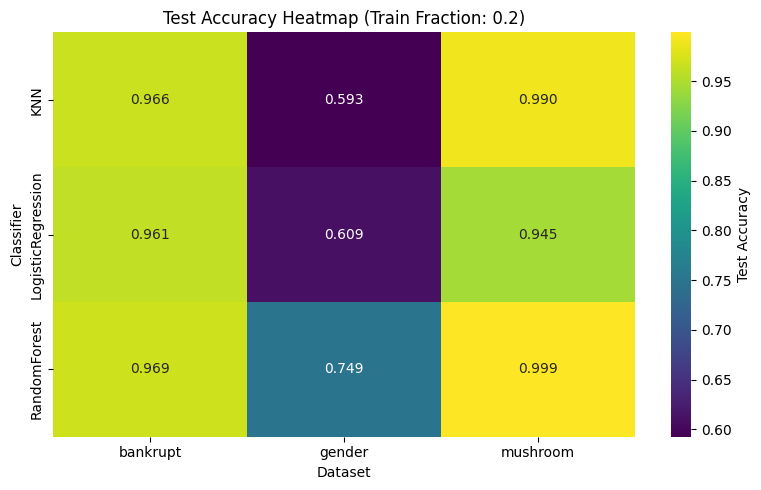

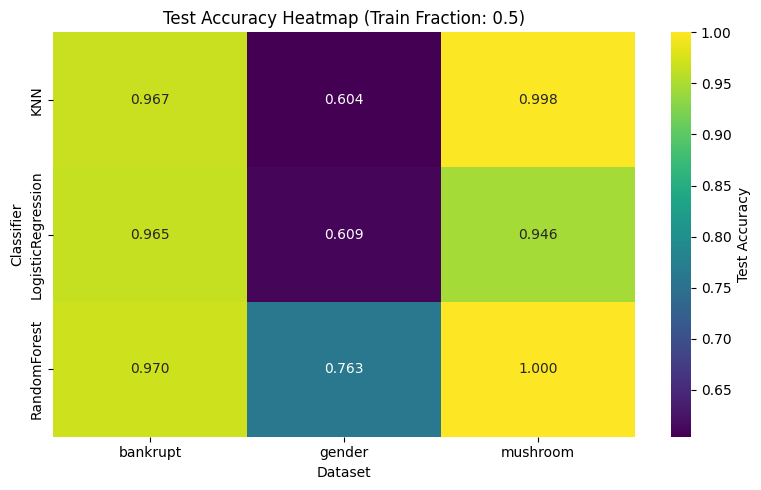

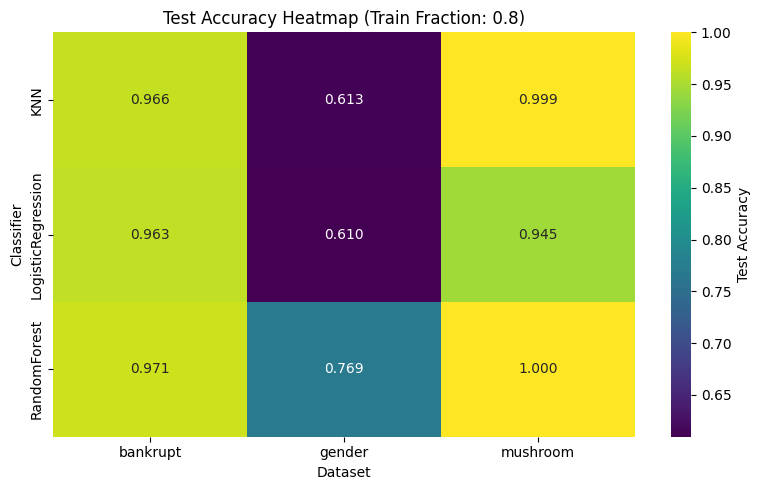

In [ ]:

agg_results = (
    all_results
    .groupby(["train_frac", "dataset", "classifier"])
    .agg(test_acc_mean=("test_acc", "mean"))
    .reset_index()
)
train_fracs = sorted(agg_results["train_frac"].unique())

for frac in train_fracs:
    subset = agg_results[agg_results["train_frac"] == frac]

    heatmap_data = subset.pivot(index="classifier", columns="dataset", values="test_acc_mean")

    plt.figure(figsize=(8,5))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".3f", 
        cmap="viridis",
        cbar_kws={'label': 'Test Accuracy'}
    )
    plt.title(f"Test Accuracy Heatmap (Train Fraction: {frac})")
    plt.ylabel("Classifier")
    plt.xlabel("Dataset")
    plt.tight_layout()
    plt.show()

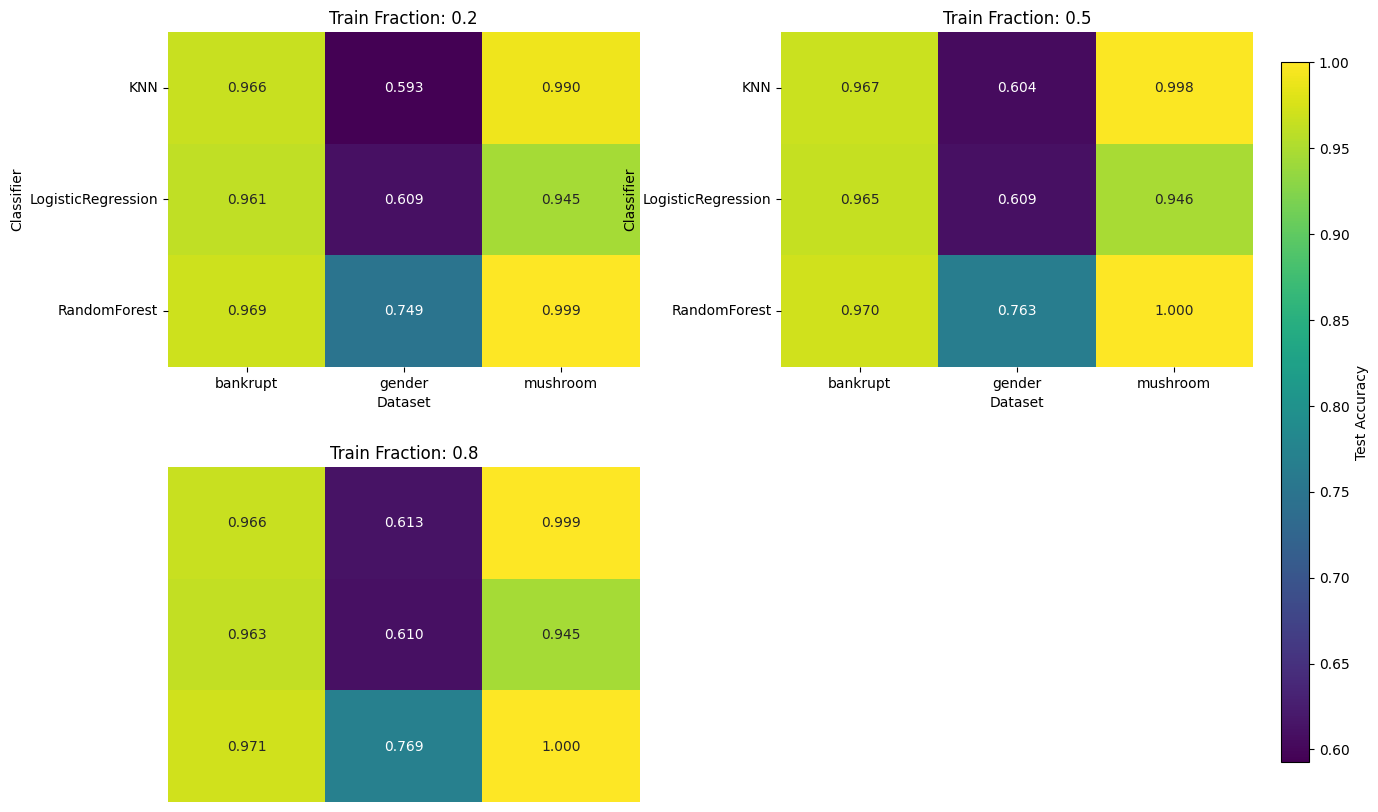

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

agg_results = (
    all_results
    .groupby(["train_frac", "dataset", "classifier"])
    .agg(test_acc_mean=("test_acc", "mean"))
    .reset_index()
)

train_fracs = sorted(agg_results["train_frac"].unique())

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[1,1], height_ratios=[1,1], hspace=0.3, wspace=0.3)


axes = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[1,0])]

vmin = agg_results['test_acc_mean'].min()
vmax = agg_results['test_acc_mean'].max()

for i, frac in enumerate(train_fracs):
    subset = agg_results[agg_results["train_frac"] == frac]
    heatmap_data = subset.pivot(index="classifier", columns="dataset", values="test_acc_mean")
    
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".3f", 
        cmap="viridis",
        vmin=vmin, vmax=vmax,  # same scale for all
        cbar=False, # if i != 0 else True,  # only first axes gets the colorbar
        ax=axes[i]
    )

    axes[i].set_title(f"Train Fraction: {frac}")
    axes[i].set_ylabel("Classifier")
    axes[i].set_xlabel("Dataset")

# Add single colorbar to the right
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
norm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin, vmax=vmax))
norm.set_array([])
fig.colorbar(norm, cax=cbar_ax, label="Test Accuracy")

# Turn off last empty subplot
axes[-1].axis('off')

plt.show()


In [89]:
bankrupts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [92]:
table_acc_1.to_latex()

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\ndataset & \\multicolumn{3}{r}{bankrupt} & \\multicolumn{3}{r}{gender} & \\multicolumn{3}{r}{mushroom} \\\\\ntrain_frac & 0.200000 & 0.500000 & 0.800000 & 0.200000 & 0.500000 & 0.800000 & 0.200000 & 0.500000 & 0.800000 \\\\\nclassifier &  &  &  &  &  &  &  &  &  \\\\\n\\midrule\nKNN & 0.966000 & 0.967000 & 0.966000 & 0.593000 & 0.604000 & 0.613000 & 0.990000 & 0.998000 & 0.999000 \\\\\nLogisticRegression & 0.961000 & 0.965000 & 0.963000 & 0.609000 & 0.609000 & 0.610000 & 0.945000 & 0.946000 & 0.945000 \\\\\nRandomForest & 0.969000 & 0.970000 & 0.971000 & 0.749000 & 0.763000 & 0.769000 & 0.999000 & 1.000000 & 1.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>dataset</th>
      <th colspan="3" halign="left">bankrupt</th>
      <th colspan="3" halign="left">gender</th>
      <th colspan="3" halign="left">mushroom</th>
    </tr>
    <tr>
      <th>train_frac</th>
      <th>0.2</th>
      <th>0.5</th>
      <th>0.8</th>
      <th>0.2</th>
      <th>0.5</th>
      <th>0.8</th>
      <th>0.2</th>
      <th>0.5</th>
      <th>0.8</th>
    </tr>
    <tr>
      <th>classifier</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>KNN</th>
      <td>0.966</td>
      <td>0.967</td>
      <td>0.966</td>
      <td>0.593</td>
      <td>0.604</td>
      <td>0.613</td>
      <td>0.990</td>
      <td>0.998</td>
      <td>0.999</td>
    </tr>
    <tr>
      <th>LogisticRegression</th>
      <td>0.961</td>
      <td>0.965</td>
      <td>0.963</td>
      <td>0.609</td>
      <td>0.609</td>
      <td>0.610</td>
      <td>0.945</td>
      <td>0.946</td>
      <td>0.945</td>
    </tr>
    <tr>
      <th>RandomForest</th>
      <td>0.969</td>
      <td>0.970</td>
      <td>0.971</td>
      <td>0.749</td>
      <td>0.763</td>
      <td>0.769</td>
      <td>0.999</td>
      <td>1.000</td>
      <td>1.000</td>
    </tr>
  </tbody>
</table>
</div>

',dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc\n0,mushroom,0,0.2,LogisticRegression,{\'C\': 1},0.9359609215315813,0.9402709359605911,0.9436923076923077\n1,mushroom,0,0.2,RandomForest,"{\'max_depth\': None, \'n_estimators\': 50}",0.9981515711645103,1.0,0.9987692307692307\n2,mushroom,0,0.2,KNN,{\'n_neighbors\': 3},0.9766047568054238,0.9963054187192119,0.9910769230769231\n3,mushroom,0,0.5,LogisticRegression,{\'C\': 1},0.9391925160019694,0.9419005416051206,0.9441161989167898\n4,mushroom,0,0.5,RandomForest,"{\'max_depth\': None, \'n_estimators\': 100}",0.999507631708518,1.0,1.0\n5,mushroom,0,0.5,KNN,{\'n_neighbors\': 3},0.9955686853766618,0.9987690792712949,0.9970457902511078\n6,mushroom,0,0.8,LogisticRegression,{\'C\': 1},0.9481461975521062,0.9486074780735497,0.940923076923077\n7,mushroom,0,0.8,RandomForest,"{\'max_depth\': None, \'n_estimators\': 50}",1.0,1.0,1.0\n8,mushroom,0,0.8,KNN,{\'n_neighbors\': 3},0.9983074555047501,1.0,0.9993846153846154\n9,mushroom,4

In [94]:
all_results

,dataset,seed,train_frac,classifier,best_params,val_acc,train_acc,test_acc
0,mushroom,0,0.2,LogisticRegression,{'C': 1},0.935961,0.940271,0.943692
1,mushroom,0,0.2,RandomForest,"{'max_depth': None, 'n_estimators': 50}",0.998152,1.000000,0.998769
2,mushroom,0,0.2,KNN,{'n_neighbors': 3},0.976605,0.996305,0.991077
3,mushroom,0,0.5,LogisticRegression,{'C': 1},0.939193,0.941901,0.944116
4,mushroom,0,0.5,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.999508,1.000000,1.000000
...,...,...,...,...,...,...,...,...
76,bankrupt,99,0.5,RandomForest,"{'max_depth': 10, 'n_estimators': 50}",0.968612,0.997653,0.971848
77,bankrupt,99,0.5,KNN,{'n_neighbors': 7},0.967733,0.968026,0.966862
78,bankrupt,99,0.8,LogisticRegression,{'C': 0.01},0.964803,0.963520,0.961877
79,bankrupt,99,0.8,RandomForest,"{'max_depth': None, 'n_estimators': 50}",0.968836,1.000000,0.972141


In [ ]:
# Generate LaTeX code for the full table
with open("all_results.tex", "w") as f:
    f.write(all_results.to_latex(index=False, longtable=True))


In [96]:
all_results.to_latex(
    "all_results.tex",
    index=False,
    longtable=True,
    escape=True   # escapes all LaTeX special characters automatically
)


In [97]:
all_results['best_params_str'] = all_results['best_params'].apply(lambda d: str(d).replace("{", "").replace("}", ""))
all_results.to_latex(
    "all_results.tex",
    index=False,
    longtable=True,
    escape=True,
    columns=['dataset','seed','train_frac','classifier','best_params_str','val_acc','train_acc','test_acc']
)

